In [1]:
import matplotlib.gridspec as gridspec
import scqubits
import numpy as np
from CoupledQuantumSystems.visualization import *
from CoupledQuantumSystems.systems import *
from tqdm import tqdm
from CoupledQuantumSystems.qobj_manip import *
# linestyles = ['-',(0,(3,1,1,1)),(0,(5,2,5,2))]
# linestyles = ['-','--',':']
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
linestyles = ['-','-','--']
linewidth_list = [1.75,1.75,1]

colors = ['#4999c3','#d5373d','black']

In [2]:
def plot_sweep_Er(ax,matrix, evals,Er_list,qls = [0,1,2],ylim=(-1,1),participating_transitions = None):
    num_evals =len(evals)

    if participating_transitions != None:
        for i in range(num_evals):
                for j in range(num_evals): 
                    if (i, j) not in participating_transitions and (j, i) not in participating_transitions:
                        matrix[i, j] = 0 

    for ql  in qls:
        color  = colors[ql]
        linestyle = linestyles[ql]
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix[ql,ql2], evals[ql2], evals[ql], Er) for ql2 in range(num_evals)] 
            shift_from_qubit_transition.append(sum(shifts))
        ax.plot(Er_list, shift_from_qubit_transition, label=rf'$\chi_{ql}$',color = color, linestyle = linestyle)

    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.minorticks_on()
    ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    ax.set_xlim(Er_list[0],Er_list[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend()

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 95086.51it/s]
 /tmp/ipykernel_897377/2806339237.py: 25WARNING:fontTools.subset:MERG NOT subset; don't know how to subset; dropped


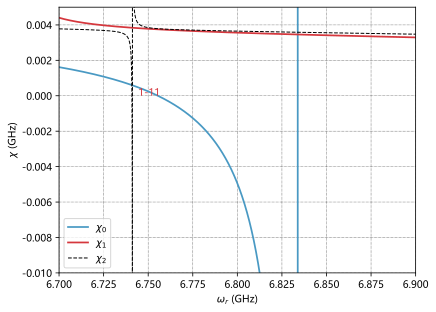

In [44]:
import matplotlib.pyplot as plt


fig,ax= plt.subplots(1,1)
n_evals = 20
qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/6,EL = 3/25, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)

Er_list = np.linspace(6.7,6.9,int(1e4))

ylim  = (-0.01,0.005) # in GHz
for ql  in [0,1,2]:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax.plot(Er_list, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.set_xlim(Er_list[0],Er_list[-1])
ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel(rf'$\omega_r$')
ax.legend(loc= 'lower left')
ax.set_xlabel(rf'$\omega_r$ (GHz)')
ax.set_yticklabels([f'{val:.3f}' for val in ax.get_yticks()])
ax.set_ylabel(r'$\chi$ (GHz)')

y_offset = -0.000
x_offset = 0.0
for i in [0,1,2]:
    allowed_j = [i + 2*n for n in range(i,10) if i + 2*n < n_evals]
    for j in allowed_j:
        freq = evals0[j]-evals0[i]
        if freq > Er_list[0] and freq < Er_list[-1]:
            ax.text(freq+x_offset, 2*np.pi* y_offset,f"{i}-{j}",color = colors[i])

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 96807.57it/s]
 /tmp/ipykernel_897377/2513104066.py: 25WARNING:fontTools.subset:MERG NOT subset; don't know how to subset; dropped


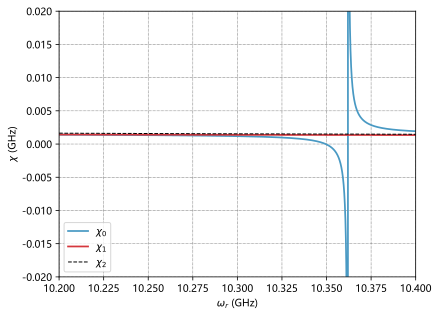

In [34]:
import matplotlib.pyplot as plt


fig,ax= plt.subplots(1,1)
n_evals = 20
qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/5,EL = 3/30, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)

Er_list = np.linspace(10.2,10.4,int(1e4))

ylim  = (-0.02,0.02) # in GHz
for ql  in [0,1,2]:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax.plot(Er_list, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax.set_xlim(Er_list[0],Er_list[-1])
ax.set_ylim(ylim[0],ylim[1])
ax.set_xlabel(rf'$\omega_r$')
ax.legend(loc= 'lower left')
ax.set_xlabel(rf'$\omega_r$ (GHz)')
ax.set_yticklabels([f'{val:.3f}' for val in ax.get_yticks()])
ax.set_ylabel(r'$\chi$ (GHz)')

y_offset = -0.0004
x_offset = 0.01
for i in [0,1,2]:
    allowed_j = [i + 2*n for n in range(i,10) if i + 2*n < n_evals]
    for j in allowed_j:
        freq = evals0[j]-evals0[i]
        if freq > Er_list[0] and freq < Er_list[-1]:
            ax.text(freq+x_offset, 2*np.pi* y_offset,f"{i}-{j}",color = colors[i])

plt.savefig("new_dis.pdf", transparent=True, bbox_inches='tight')

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 89103.82it/s]
 /tmp/ipykernel_748674/2243353606.py: 73

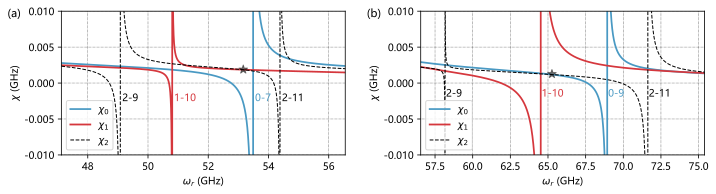

In [7]:
n_evals = 20
qls = [0,1,2]
max_ol = 50
max_ql = 20

fig = plt.figure(figsize=(10, 2.5)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.1, right=0.495,bottom=0.15,top = 0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.6, right=0.995,bottom=0.15,top = 0.95)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])

plt.text(-0.19, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.19, 1.02, '(b)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')

####################################################
# a
####################################################

qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/4,EL = 3/20.5, cutoff = 110,flux = 0,truncated_dim=n_evals)
matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
evals0 = qbt0.eigenvals(n_evals)
Er_list0 = np.linspace(7.5,9,int(1e4))
Er_list0_with_2pi = Er_list0*2*np.pi
ylim  = (-0.01,0.01) # in GHz
for ql  in qls:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list0, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax0.plot(Er_list0_with_2pi, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])

ax0.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax0.set_xlim(Er_list0_with_2pi[0],Er_list0_with_2pi[-1])
ax0.set_ylim(ylim[0],ylim[1])
ax0.set_xlabel(rf'$\omega_r$')
ax0.legend(loc= 'lower left')
ax0.set_xlabel(rf'$\omega_r$ (GHz)')
ax0.set_yticklabels([f'{val:.3f}' for val in ax0.get_yticks()])
ax0.set_ylabel(r'$\chi$ (GHz)')
ax0.scatter(8.46111172*2*np.pi,0.0003*2*np.pi, marker='*', color='black', s=80,alpha=0.5,zorder=10)

y_offset = -0.0004
x_offset = 0.01
ax0.text((evals0[9]-evals0[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-9',color = colors[2])
ax0.text((evals0[10]-evals0[1]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'1-10',color = colors[1])
ax0.text((evals0[7]-evals0[0]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'0-7',color = colors[0])
ax0.text((evals0[11]-evals0[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-11',color = colors[2])

####################################################
# b 
####################################################
EJ_over_EC = 2.7
EJ_over_EL = 45
qbt1 = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = 0,truncated_dim=n_evals)
evals1 = qbt1.eigenvals(n_evals)
matrix1 =  qbt1.matrixelement_table(operator = "n_operator",evals_count=n_evals)
Er_list1 = np.linspace(9,12,int(1e4))
Er_list1_with_2pi = Er_list1*2*np.pi
ylim  = (-0.01,0.01)
for ql  in qls:
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list1, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix1[ql,ql2], evals1[ql2], evals1[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax1.plot(Er_list1_with_2pi,2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])

ax1.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax1.set_xlim(Er_list1_with_2pi[0],Er_list1_with_2pi[-1])
ax1.set_ylim(ylim[0],ylim[1])
ax1.set_xlabel(rf'$\omega_r$')
ax1.legend(loc= 'lower left')
ax1.set_xlabel(rf'$\omega_r$ (GHz)')
ax1.set_yticklabels([f'{val:.3f}' for val in ax0.get_yticks() ])
ax1.set_ylabel(r'$\chi$ (GHz)')
ax1.scatter(10.38695526*2*np.pi,0.0002*2*np.pi, marker='*', color='black', s=80,alpha=0.5,zorder=10)

y_offset = -0.0003
x_offset = 0.01
ax1.text((evals1[9]-evals1[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-9',color = colors[2])
ax1.text((evals1[10]-evals1[1]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'1-10',color = colors[1])
ax1.text((evals1[9]-evals1[0]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'0-9',color = colors[0])
ax1.text((evals1[11]-evals1[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-11',color = colors[2])
fig.savefig('dispersive_shift_sweep_smaller.pdf')

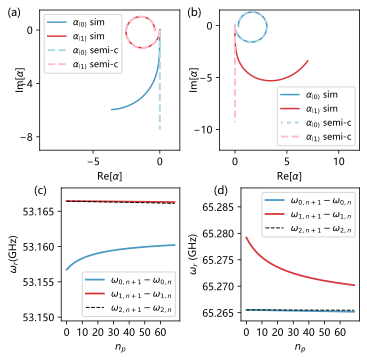

In [14]:

import pickle

def alpha(t, Delta_rd, epsilon_r, kappa):
    return (-1j*epsilon_r / (1j*Delta_rd + kappa/2)) * (1 - np.exp(-(1j*Delta_rd + kappa/2)*t))

fig = plt.figure(figsize = (5,5))
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.09, right=0.48,bottom=0.55,top = 0.99)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.59, right=0.98,bottom=0.55,top = 0.99)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=0.15, right=0.48,bottom=0.1,top = 0.47)
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=0.65, right=0.98,bottom=0.1,top = 0.47)
ax2 = fig.add_subplot(gs2[0])
ax3 = fig.add_subplot(gs3[0])


def plot_ef_alpha(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.003 *2*np.pi # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]

    frequency_used = -1*(system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]])
    with open('../ef_consistent/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#4999c3',label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#d5373d',label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = 1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa)
    ax.plot(-alpha_t_values.real, alpha_t_values.imag ,color='lightblue',linestyle='--',lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]) -\
                        (system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]))  # Detuning of the readout resonator
    alpha_t_values =  1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa)
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')

    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlim(-9,1.5)
    ax.set_ylim(-9,1.5)
    ax.set_yticks([0,-4,-8])
plot_ef_alpha(ax0)

def plot_gf_alpha(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.005*2*np.pi  # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = (np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#4999c3",label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = (np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#d5373d",label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)



    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]) -\
                        (system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]))  # Detuning of the readout resonator
    alpha_t_values =( 1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='lightblue',linestyle=(1,(2,2,2,2)),lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = (1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real, alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')


    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_xlim(-1.5,12.0)
    ax.set_ylim(-12,1.5)
    ax.set_yticks([0,-5,-10])
plot_gf_alpha(ax1)


def plot_ef_non_linearity(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], 2*np.pi* np.array(dressed_osc_frequencies[j][:n_osc_lvls]),label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_ylim(2*np.pi*8.459, 2*np.pi*8.462)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$(GHz)')
    ax.set_xlabel(r'$n_p$')
plot_ef_non_linearity(ax2)

def plot_gf_non_linearity(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], 2*np.pi* np.array(dressed_osc_frequencies[j][:n_osc_lvls]),label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_ylim(2*np.pi*10.387, 2*np.pi*10.391)
    ax.legend(loc = 'upper right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$ (GHz)')
    ax.set_xlabel(r'$n_p$')
plot_gf_non_linearity(ax3)

plt.text(-0.23, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(b)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(c)', transform=plt.subplot(gs2[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(d)', transform=plt.subplot(gs3[0]).transAxes, fontsize=11, va='top', color='black')


fig.savefig('nonlinearity.pdf')

 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345

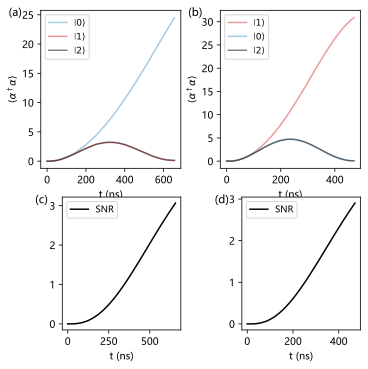

In [26]:
import scipy
import pickle

def alpha(t, Delta_rd, epsilon_r, kappa):
    return (-1j*epsilon_r / (1j*Delta_rd + kappa/2)) * (1 - np.exp(-(1j*Delta_rd + kappa/2)*t))

fig = plt.figure(figsize = (5,5))
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.09, right=0.48,bottom=0.55,top = 0.99)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.59, right=0.98,bottom=0.55,top = 0.99)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=0.15, right=0.48,bottom=0.1,top = 0.47)
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=0.65, right=0.98,bottom=0.1,top = 0.47)
ax2 = fig.add_subplot(gs2[0])
ax3 = fig.add_subplot(gs3[0])


def plot_ef_pn(ax):
    with open('../ef_consistent/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    for ql, result in zip([0,1,2],results[:3]):
        ax.plot(tlist,result.expect[1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()
    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
plot_ef_pn(ax0)

def plot_gf_pn(ax):
    with open('../gf_detection/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    for ql, result in zip([1,0,2],results[:3]):
        ax.plot(tlist[:last_t_idx+1],result.expect[1][:last_t_idx+1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()

    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
plot_gf_pn(ax1)


def plot_ef_SNR(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    frequency_used = -1* 8.460155465243822
    with open('../ef_consistent/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist,initial=0)
    denominator =np.sqrt(kappa *  tlist / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist,SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
plot_ef_SNR(ax2)

def plot_gf_SNR(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1] 
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist[:last_t_idx+1],initial=0)
    denominator =np.sqrt(kappa *  tlist[:last_t_idx+1] / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist[:last_t_idx+1],SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
plot_gf_SNR(ax3)

plt.text(-0.23, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(b)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(c)', transform=plt.subplot(gs2[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(d)', transform=plt.subplot(gs3[0]).transAxes, fontsize=11, va='top', color='black')


fig.savefig('photon_number_SNR.pdf')

# Combine the plots

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 94399.33it/s]
 /tmp/ipykernel_748674/3607823827.py: 99ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1699ComplexWarning: Casting complex values to real discards the imaginary part
 /home/kai/miniconda3/envs/test/lib/python3.10/site-packages/matplotlib/cbook.py: 1345WARNING:fontTools.subset:MERG NOT subset; don't know how to subset; dropped


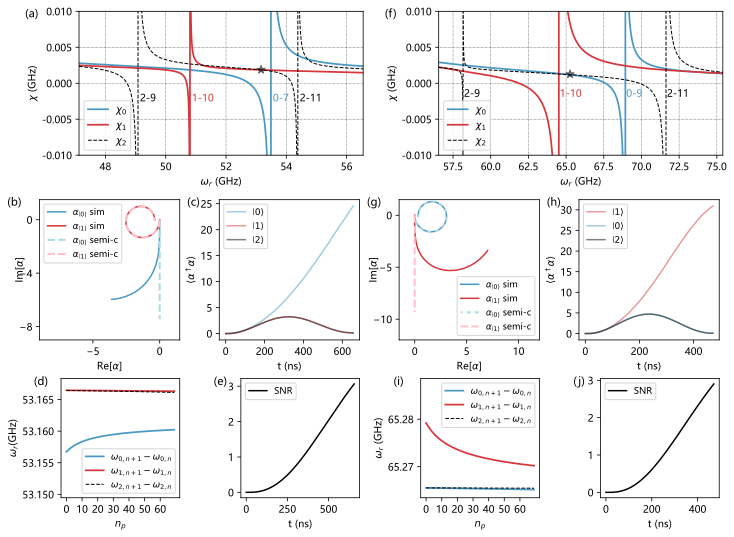

In [37]:
n_evals = 20
qls = [0,1,2]
max_ol = 50
max_ql = 20

fig = plt.figure(figsize=(10, 7.5)) 
first_row_height = 0.65
second_row_height = 1/3
first_two_column_width = 1/2
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.1, right=0.495,bottom=first_row_height+second_row_height*0.15,top = first_row_height+second_row_height*0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.6, right=0.995,bottom=first_row_height+second_row_height*0.15,top = first_row_height+second_row_height*0.95)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])

gs0_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.09, right=first_two_column_width*0.48,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs1_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.59, right=first_two_column_width*0.98,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs2_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.15, right=first_two_column_width*0.48,bottom=first_row_height*0.1,top = first_row_height*0.44)
gs3_ef = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width*0.65, right=first_two_column_width*0.98,bottom=first_row_height*0.1,top = first_row_height*0.44)
ax0_ef = fig.add_subplot(gs0_ef[0])
ax1_ef = fig.add_subplot(gs1_ef[0])
ax2_ef = fig.add_subplot(gs2_ef[0])
ax3_ef = fig.add_subplot(gs3_ef[0])

gs0_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.09, right=first_two_column_width+first_two_column_width*0.48,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs1_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.59, right=first_two_column_width+first_two_column_width*0.98,bottom=first_row_height*0.55,top = first_row_height*0.95)
gs2_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.15, right=first_two_column_width+first_two_column_width*0.48,bottom=first_row_height*0.1,top = first_row_height*0.44)
gs3_gf = fig.add_gridspec(nrows=1, ncols=1,left=first_two_column_width+first_two_column_width*0.65, right=first_two_column_width+first_two_column_width*0.98,bottom=first_row_height*0.1,top = first_row_height*0.44)
ax0_gf = fig.add_subplot(gs0_gf[0])
ax1_gf = fig.add_subplot(gs1_gf[0])
ax2_gf = fig.add_subplot(gs2_gf[0])
ax3_gf = fig.add_subplot(gs3_gf[0])

plt.text(-0.19, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.19, 1.02, '(f)', transform=plt.subplot(gs1[0]).transAxes, fontsize=11, va='top', color='black')

plt.text(-0.23, 1.02, '(b)', transform=plt.subplot(gs0_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(c)', transform=plt.subplot(gs1_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(d)', transform=plt.subplot(gs2_ef[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(e)', transform=plt.subplot(gs3_ef[0]).transAxes, fontsize=11, va='top', color='black')

plt.text(-0.23, 1.02, '(g)', transform=plt.subplot(gs0_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(h)', transform=plt.subplot(gs1_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(i)', transform=plt.subplot(gs2_gf[0]).transAxes, fontsize=11, va='top', color='black')
plt.text(-0.23, 1.02, '(j)', transform=plt.subplot(gs3_gf[0]).transAxes, fontsize=11, va='top', color='black')

def plot_sweep_er_ef(ax):
    qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/4,EL = 3/20.5, cutoff = 110,flux = 0,truncated_dim=n_evals)
    matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
    evals0 = qbt0.eigenvals(n_evals)
    Er_list0 = np.linspace(7.5,9,int(1e4))
    Er_list0_with_2pi = Er_list0*2*np.pi
    ylim  = (-0.01,0.01) # in GHz
    for ql  in qls:
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list0, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
            shift_from_qubit_transition.append(sum(shifts)/100)
        ax.plot(Er_list0_with_2pi, 2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])
    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.set_xlim(Er_list0_with_2pi[0],Er_list0_with_2pi[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend(loc= 'lower left')
    ax.set_xlabel(rf'$\omega_r$ (GHz)')
    ax.set_yticklabels([f'{val:.3f}' for val in ax.get_yticks()])
    ax.set_ylabel(r'$\chi$ (GHz)')
    ax.scatter(8.46111172*2*np.pi,0.0003*2*np.pi, marker='*', color='black', s=80,alpha=0.5,zorder=10)

    y_offset = -0.0004
    x_offset = 0.01
    ax.text((evals0[9]-evals0[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-9',color = colors[2])
    ax.text((evals0[10]-evals0[1]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'1-10',color = colors[1])
    ax.text((evals0[7]-evals0[0]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'0-7',color = colors[0])
    ax.text((evals0[11]-evals0[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-11',color = colors[2])
plot_sweep_er_ef(ax0)

def plot_sweep_er_gf(ax):
    EJ_over_EC = 2.7
    EJ_over_EL = 45
    qbt1 = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = 0,truncated_dim=n_evals)
    evals1 = qbt1.eigenvals(n_evals)
    matrix1 =  qbt1.matrixelement_table(operator = "n_operator",evals_count=n_evals)
    Er_list1 = np.linspace(9,12,int(1e4))
    Er_list1_with_2pi = Er_list1*2*np.pi
    ylim  = (-0.01,0.01)
    for ql  in qls:
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list1, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix1[ql,ql2], evals1[ql2], evals1[ql], Er) for ql2 in range(n_evals)] 
            shift_from_qubit_transition.append(sum(shifts)/100)
        ax.plot(Er_list1_with_2pi,2*np.pi* np.array(shift_from_qubit_transition), label=rf'$\chi_{ql}$',color = colors[ql], linestyle = linestyles[ql],linewidth = linewidth_list[ql])

    ax.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax.set_xlim(Er_list1_with_2pi[0],Er_list1_with_2pi[-1])
    ax.set_ylim(ylim[0],ylim[1])
    ax.set_xlabel(rf'$\omega_r$')
    ax.legend(loc= 'lower left')
    ax.set_xlabel(rf'$\omega_r$ (GHz)')
    ax.set_yticklabels([f'{val:.3f}' for val in ax0.get_yticks() ])
    ax.set_ylabel(r'$\chi$ (GHz)')
    ax.scatter(10.38695526*2*np.pi,0.0002*2*np.pi, marker='*', color='black', s=80,alpha=0.5,zorder=10)
    y_offset = -0.0003
    x_offset = 0.01
    ax.text((evals1[9]-evals1[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-9',color = colors[2])
    ax.text((evals1[10]-evals1[1]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'1-10',color = colors[1])
    ax.text((evals1[9]-evals1[0]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'0-9',color = colors[0])
    ax.text((evals1[11]-evals1[2]+x_offset)*2*np.pi, 2*np.pi* (y_offset),'2-11',color = colors[2])
plot_sweep_er_gf(ax1)

def plot_ef_alpha(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.003 *2*np.pi # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]

    frequency_used = -1*(system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]])
    with open('../ef_consistent/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#4999c3',label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)
    ax.plot(alpha_arr.real,alpha_arr.imag, color='#d5373d',label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = 1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa)
    ax.plot(-alpha_t_values.real, alpha_t_values.imag ,color='lightblue',linestyle='--',lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]) -\
                        (system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]))  # Detuning of the readout resonator
    alpha_t_values =  1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa)
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')

    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlim(-9,1.5)
    ax.set_ylim(-9,1.5)
    ax.set_yticks([0,-4,-8])
plot_ef_alpha(ax0_ef)

def plot_gf_alpha(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    epsilon_r = 0.005*2*np.pi  # External driving term
    kappa = 1e-3 # Decay rate of the resonator
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr = (np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#4999c3",label = rf'$\alpha_{{\left|0\right>}}$ sim',alpha=1)
    alpha_arr = (np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    ax.plot(alpha_arr.real,alpha_arr.imag,color="#d5373d",label = rf'$\alpha_{{\left|1\right>}}$ sim',alpha=1)



    Delta_rd = 2*np.pi*((system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]]) -\
                        (system.evals[system.product_to_dressed[(0,1)]]-system.evals[system.product_to_dressed[(0,0)]]))  # Detuning of the readout resonator
    alpha_t_values =( 1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real , alpha_t_values.imag, color='lightblue',linestyle=(1,(2,2,2,2)),lw=2,label=rf'$\alpha_{{\left|0\right>}}$ semi-c')

    Delta_rd = 0  # Detuning of the readout resonator
    alpha_t_values = (1/np.sqrt(2)*alpha(tlist, Delta_rd, epsilon_r, kappa) )[:last_t_idx+1]
    ax.plot(-alpha_t_values.real, alpha_t_values.imag, color='pink',linestyle='--',lw=2,label=rf'$\alpha_{{\left|1\right>}}$ semi-c')


    ax.set_aspect('equal')
    ax.set_xlabel(rf'Re[$\alpha$]')
    ax.set_ylabel(rf'Im[$\alpha$]', labelpad=-6)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_xlim(-1.5,12.0)
    ax.set_ylim(-12,1.5)
    ax.set_yticks([0,-5,-10])
plot_gf_alpha(ax0_gf)

def plot_ef_non_linearity(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], 2*np.pi* np.array(dressed_osc_frequencies[j][:n_osc_lvls]),label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_ylim(2*np.pi*8.459, 2*np.pi*8.462)
    ax.legend(loc = 'lower right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$(GHz)')
    ax.set_xlabel(r'$n_p$')
plot_ef_non_linearity(ax2_ef)

def plot_gf_non_linearity(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    energies=  system.hilbertspace.eigenvals(system.qbt.truncated_dim * system.osc.truncated_dim)
    def dressed_ener(ql,ol):
        return energies[system.product_to_dressed[(ql,ol)]]
    n_osc_lvls =70
    dressed_osc_frequencies = [[] for _ in range(3)]
    for j in [0,1,2]:
        for i in range(0,system.osc.truncated_dim-1):
            dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
    for j in [0,1,2]:
        ax.plot(list(range(system.osc.truncated_dim-1))[:n_osc_lvls], 2*np.pi* np.array(dressed_osc_frequencies[j][:n_osc_lvls]),label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j],linewidth = linewidth_list[j])
    ax.set_xticks(list(range(n_osc_lvls))[::10])
    ax.set_ylim(2*np.pi*10.387, 2*np.pi*10.391)
    ax.legend(loc = 'upper right',prop={'size': 9})
    ax.set_ylabel(rf'$\omega_r$ (GHz)')
    ax.set_xlabel(r'$n_p$')
plot_gf_non_linearity(ax2_gf)

def plot_ef_pn(ax):
    with open('../ef_consistent/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    for ql, result in zip([0,1,2],results[:3]):
        ax.plot(tlist,result.expect[1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()
    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
plot_ef_pn(ax1_ef)

def plot_gf_pn(ax):
    with open('../gf_detection/mcsolve_results_with_product_basis.pkl', 'rb') as f:
        results = pickle.load(f)
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    for ql, result in zip([1,0,2],results[:3]):
        ax.plot(tlist[:last_t_idx+1],result.expect[1][:last_t_idx+1],color=colors[ql],label = rf'$\left|{ql}\right>$',alpha=0.5)
    ax.legend()

    ax.set_xlabel(rf't (ns)')
    ax.set_ylabel(rf'$\langle \alpha^\dagger \alpha \rangle$')
    ax.legend(loc = 'upper left',prop={'size': 9})
plot_gf_pn(ax1_gf)

def plot_ef_SNR(ax):
    with open('../ef_consistent/ef_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =660
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    frequency_used = -1* 8.460155465243822
    with open('../ef_consistent/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist,initial=0)
    denominator =np.sqrt(kappa *  tlist / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist,SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
plot_ef_SNR(ax3_ef)

def plot_gf_SNR(ax):
    with open('../gf_detection/gf_mcsolve_system.pkl', 'rb') as f:
        system = pickle.load(f)
    kappa = 1e-3
    # efficiency = 1/4
    efficiency = 1
    tot_time =500
    tlist = np.linspace(0, tot_time, tot_time)[::5]
    last_t_idx = 94
    frequency_used = -1*(system.evals[system.product_to_dressed[(1,1)]]-system.evals[system.product_to_dressed[(1,0)]])
    with open('../gf_detection/averaged.pkl', 'rb') as f:
        results = pickle.load(f)
    alpha_arr_0 = np.sqrt(kappa)*(np.sqrt(2)*results[1].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist)  )[:last_t_idx+1] 
    alpha_arr_1 = np.sqrt(kappa)*(np.sqrt(2)*results[0].expect[0]*np.exp(-1j * 2 * np.pi * frequency_used * tlist) )[:last_t_idx+1]
    diff_arr = np.abs(alpha_arr_0-alpha_arr_1)
    numerator = np.sqrt(kappa * efficiency) * scipy.integrate.cumulative_trapezoid(diff_arr, tlist[:last_t_idx+1],initial=0)
    denominator =np.sqrt(kappa *  tlist[:last_t_idx+1] / 2 * 2)
    denominator[0]+= 1e-10 # avoid dividing by zero
    SNR = numerator / denominator
    ax.plot(tlist[:last_t_idx+1],SNR,color='black',label='SNR')
    ax.legend(loc = 'upper left',prop={'size': 9})
    ax.set_xlabel(rf't (ns)')
plot_gf_SNR(ax3_gf)

plt.savefig("photon_number_SNR.pdf", transparent=True, bbox_inches='tight')

Er loop: 100%|██████████| 10000/10000 [00:00<00:00, 114812.72it/s]
 /tmp/ipykernel_4166/3063795874.py: 117

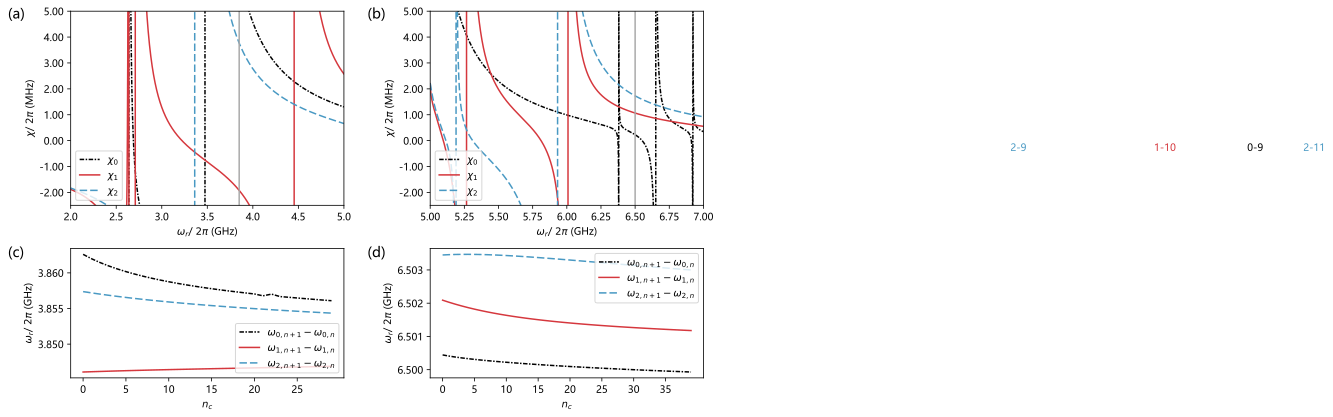

In [117]:
n_evals = 20
qls = [0,1,2]
max_ol = 50
max_ql = 20

fig = plt.figure(figsize=(10, 6)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=0.1, right=0.48,bottom=0.5,top = 0.95)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=0.6, right=0.98,bottom=0.5,top = 0.95)
ax0 = fig.add_subplot(gs0[0])
ax1 = fig.add_subplot(gs1[0])
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=0.1, right=0.48,bottom=0.1,top = 0.4)
gs3 = fig.add_gridspec(nrows=1, ncols=1,left=0.6, right=0.98,bottom=0.1,top = 0.4)
ax2 = fig.add_subplot(gs2[0])
ax3 = fig.add_subplot(gs3[0])

plt.text(-0.23, 1.02, '(a)', transform=plt.subplot(gs0[0]).transAxes, fontsize=14, va='top', color='black')
plt.text(-0.23, 1.02, '(b)', transform=plt.subplot(gs1[0]).transAxes, fontsize=14, va='top', color='black')
plt.text(-0.23, 1.02, '(c)', transform=plt.subplot(gs2[0]).transAxes, fontsize=14, va='top', color='black')
plt.text(-0.23, 1.02, '(d)', transform=plt.subplot(gs3[0]).transAxes, fontsize=14, va='top', color='black')

####################################################
# a
#
####################################################

def do_plot_a(qbt0):
    matrix0 =  qbt0.matrixelement_table(operator = "n_operator",evals_count=n_evals)
    evals0 = qbt0.eigenvals(n_evals)
    Er_list0 = np.linspace(2,5,int(1e4))
    ylim  = (-0.0025,0.005) # in GHz
    for ql  in qls:
        color  = colors[ql]
        linestyle = linestyles[ql]
        shift_from_qubit_transition = []
        for Er in tqdm(Er_list0, desc = "Er loop"):
            shifts = [get_shift_accurate(matrix0[ql,ql2], evals0[ql2], evals0[ql], Er) for ql2 in range(n_evals)] 
            shift_from_qubit_transition.append(sum(shifts)/100)
        ax0.plot(Er_list0, shift_from_qubit_transition, label=rf'$\chi_{ql}$',color = color, linestyle = linestyle)

    # ax0.grid(which='major', linestyle=':', linewidth='0.5', color='black')
    ax0.set_xlim(Er_list0[0],Er_list0[-1])
    ax0.set_ylim(ylim[0],ylim[1])
    ax0.set_xlabel(rf'$\omega_r$')
    ax0.legend(loc= 'lower left')
    ax0.set_xlabel(rf'$\omega_r$/ $2\pi$ (GHz)')
    ax0.set_yticklabels([f'{val:.2f}' for val in ax0.get_yticks() *1000])
    ax0.set_ylabel(r'$\chi$/ $2\pi$ (MHz)')
    # ax0.scatter(8.46111172,0.0003, marker='*', color='black', s=80,alpha=0.5)
    # y_offset = -0.0006
    # x_offset = 0.01
    # ax0.text(evals0[9]-evals0[2]+x_offset, y_offset,'2-9',color = colors[2])
    # ax0.text(evals0[10]-evals0[1]+x_offset, y_offset,'1-10',color = colors[1])
    # ax0.text(evals0[7]-evals0[0]+x_offset, y_offset,'0-7',color = colors[0])
    # ax0.text(evals0[11]-evals0[2]+x_offset, y_offset,'2-11',color = colors[2])
qbt0 = scqubits.Fluxonium(EJ = 3,EC = 3/4,EL = 3/20.5, cutoff = 110,flux = 0.0,truncated_dim=n_evals)
do_plot_a(qbt0)

ax0.axvline(3.85,color='darkgrey')

####################################################
# c 
#
####################################################
system = FluxoniumOscillatorSystem(
    EJ = 3,EC = 3/4,EL = 3/20.5,
    Er = 3.85,
    g_strength = 0.2,
    fluxonium_flux = 0.0,
    qubit_level = max_ql,
    osc_level = max_ol,
    products_to_keep=[[ql, ol] for ql in range(max_ql) for ol in range(max_ol) ],
    computaional_states = '1,2'
    )
energies=  system.hilbertspace.eigenvals(max_ql * max_ol)
def dressed_ener(ql,ol):
    return energies[system.product_to_dressed[(ql,ol)]]
n_osc_lvls =30
dressed_osc_frequencies = [[] for _ in range(3)]
for j in [0,1,2]:
    for i in range(0,max_ol-1):
        dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
for j in [0,1,2]:
    ax2.plot(list(range(max_ol-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j])
ax2.set_xticks(list(range(n_osc_lvls))[::5])
# ax2.set_ylim(8.47, 8.482)
ax2.legend(loc = 'lower right')
ax2.set_ylabel(rf'$\omega_r$/ $2\pi$ (GHz)')
ax2.set_xlabel(r'$n_c$')

####################################################
# b 
#
####################################################
EJ_over_EC = 2.7
EJ_over_EL = 45
flux_1 = 0.01
qbt1 = scqubits.Fluxonium(EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL, cutoff = 110,flux = flux_1,truncated_dim=n_evals)
evals1 = qbt1.eigenvals(n_evals)
matrix1 =  qbt1.matrixelement_table(operator = "n_operator",evals_count=n_evals)
Er_list1 = np.linspace(5,7,int(1e4))
ylim  = (-0.0025,0.005)
for ql  in qls:
    color  = colors[ql]
    linestyle = linestyles[ql]
    shift_from_qubit_transition = []
    for Er in tqdm(Er_list1, desc = "Er loop"):
        shifts = [get_shift_accurate(matrix1[ql,ql2], evals1[ql2], evals1[ql], Er) for ql2 in range(n_evals)] 
        shift_from_qubit_transition.append(sum(shifts)/100)
    ax1.plot(Er_list1, shift_from_qubit_transition, label=rf'$\chi_{ql}$',color = color, linestyle = linestyle)

# ax1.grid(which='major', linestyle=':', linewidth='0.5', color='black')
ax1.set_xlim(Er_list1[0],Er_list1[-1])
ax1.set_ylim(ylim[0],ylim[1])
ax1.set_xlabel(rf'$\omega_r$')
ax1.legend(loc= 'lower left')
ax1.set_xlabel(rf'$\omega_r$/ $2\pi$ (GHz)')
ax1.set_yticklabels([f'{val:.2f}' for val in ax1.get_yticks() *1000])
ax1.set_ylabel(r'$\chi$/ $2\pi$ (MHz)')
ax1.scatter(10.38695526,0.0002, marker='*', color='black', s=80,alpha=0.5)

y_offset = -0.0004
x_offset = 0.01
ax1.text(evals1[9]-evals1[2]+x_offset, y_offset,'2-9',color = colors[2])
ax1.text(evals1[10]-evals1[1]+x_offset, y_offset,'1-10',color = colors[1])
ax1.text(evals1[9]-evals1[0]+x_offset, y_offset,'0-9',color = colors[0])
ax1.text(evals1[11]-evals1[2]+x_offset, y_offset,'2-11',color = colors[2])

ax1.axvline(6.5,color='darkgrey')
####################################################
# d
#
####################################################

system = FluxoniumOscillatorSystem(
   EJ = 4,EC = 4/EJ_over_EC,EL = 4/EJ_over_EL,
    Er = 6.5,
    g_strength = 0.2,
    fluxonium_flux = flux_1,
    qubit_level = max_ql,
    osc_level = max_ol,
    products_to_keep=[[ql, ol] for ql in range(max_ql) for ol in range(max_ol) ],
    computaional_states = '0,2'
    )
energies=  system.hilbertspace.eigenvals(max_ql * max_ol)
def dressed_ener(ql,ol):
    return energies[system.product_to_dressed[(ql,ol)]]
n_osc_lvls =40
dressed_osc_frequencies = [[] for _ in range(3)]
for j in [0,1,2]:
    for i in range(0,max_ol-1):
        dressed_osc_frequencies[j].append(dressed_ener(j,i+1)-dressed_ener(j,i))   
for j in [0,1,2]:
    ax3.plot(list(range(max_ol-1))[:n_osc_lvls], dressed_osc_frequencies[j][:n_osc_lvls],label=rf'$\omega_{{{j},n+1}} - \omega_{{{j},n}}$',color = colors[j], linestyle = linestyles[j])
ax3.set_xticks(list(range(n_osc_lvls))[::5])
# ax3.set_ylim(10.387, 10.391)
ax3.legend(loc = 'upper right')
ax3.set_ylabel(rf'$\omega_r$/ $2\pi$ (GHz)')
ax3.set_xlabel(r'$n_c$')

fig.savefig('dispersive_shift_with_diagonalization_three_outcome_measurement.pdf')